In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
from IPython import display
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve, RocCurveDisplay, ConfusionMatrixDisplay

train_csv = pd.read_csv("./train.csv")
test_csv = pd.read_csv("./test.csv")

print(train_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
print(test_csv.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB
None


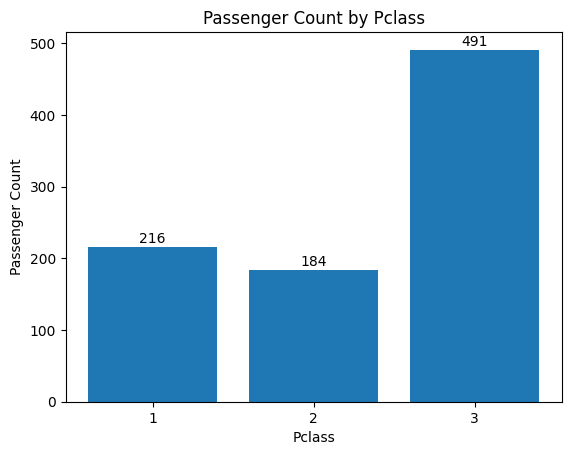

In [4]:
pclass_counts = train_csv["Pclass"].value_counts()

bars = plt.bar(pclass_counts.index, pclass_counts.values)
plt.title("Passenger Count by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Passenger Count")
plt.xticks(pclass_counts.index, [str(int(x)) for x in pclass_counts.index])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.0f}", ha="center", va="bottom")

plt.savefig("titanic_bar_graph.png", dpi=300)
plt.show()

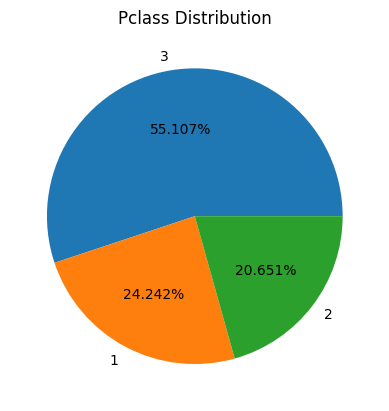

In [9]:
plt.pie(pclass_counts.values, labels=pclass_counts.index, autopct="%1.3f%%")
plt.title("Pclass Distribution")

plt.show()

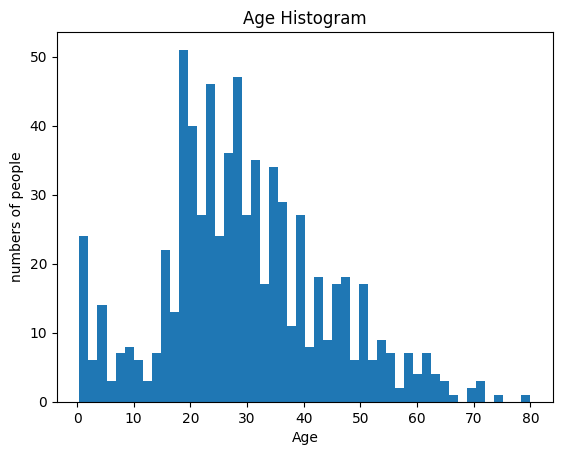

In [18]:
plt.hist(train_csv["Age"].values, bins=50)
plt.title("Age Histogram")
plt.xlabel("Age")
plt.ylabel("numbers of people")

plt.show()

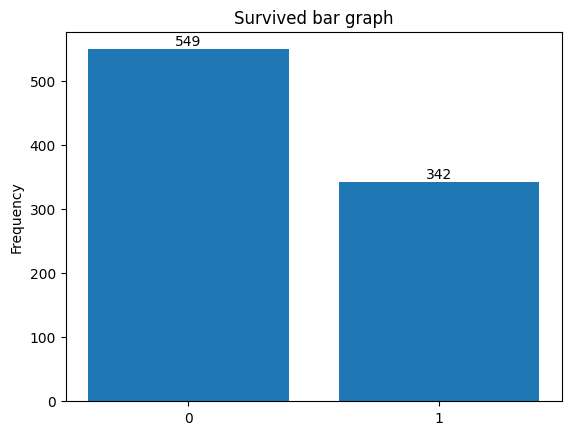

In [ ]:
survived_counts = train_csv["Survived"].value_counts()

bars = plt.bar(survived_counts.index, survived_counts.values)
plt.ylabel("Frequency")
plt.title("Survived bar graph")
plt.xticks(survived_counts.index, [str(int(x)) for x in survived_counts.index])

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f"{height:.0f}", ha="center", va="bottom")

plt.show()


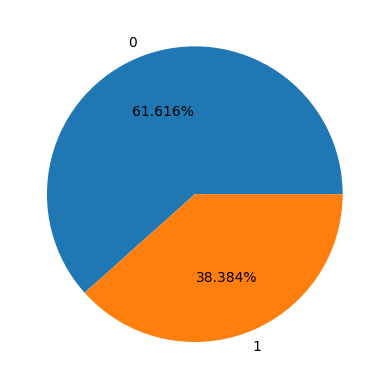

In [28]:
plt.pie(survived_counts.values, labels=survived_counts.index, autopct="%1.3f%%")

plt.show()

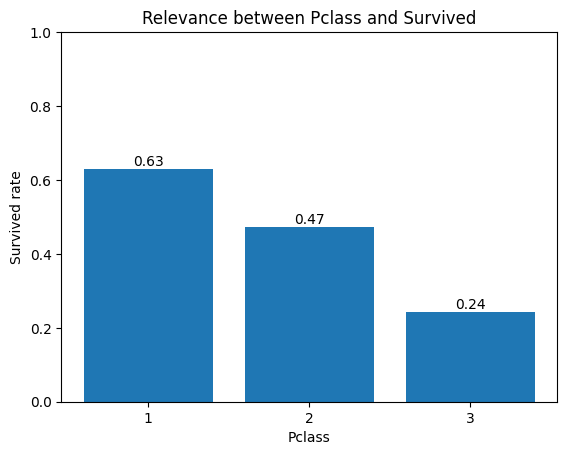

In [ ]:
pclass_survived_rate = train_csv.groupby("Pclass")["Survived"].mean() # 重要ポイント

bars = plt.bar(pclass_survived_rate.index, pclass_survived_rate.values)
plt.xticks(pclass_survived_rate.index, [str(int(x)) for x in pclass_survived_rate.index])
plt.xlabel("Pclass")
plt.ylabel("Survived rate")
plt.title("Survived rate by Pclass")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f"{height:.2f}", ha="center", va="bottom")

plt.ylim(0, 1.0) # 重要ポイント

plt.show()

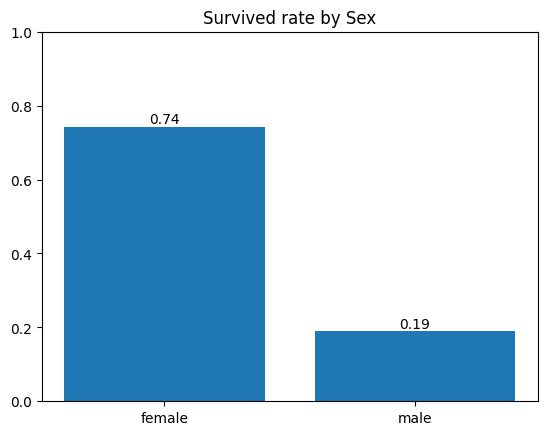

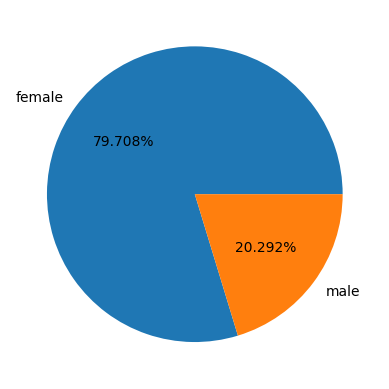

In [ ]:
sex_survived_rate = train_csv.groupby("Sex")["Survived"].mean()

# 棒グラフ
bars = plt.bar(sex_survived_rate.index, sex_survived_rate.values)
plt.title("Survived rate by Sex")

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.001, f"{height:.2f}", ha="center", va="bottom")

plt.ylim(0, 1)

plt.show()

# 円グラフ
plt.pie(sex_survived_rate.values, labels=sex_survived_rate.index, autopct="%1.3f%%")

plt.show()